In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('20201020-vk-spb_today.csv', index_col=['id'])

In [6]:
df = df[df['text'].notnull()]

In [7]:
df['date'] = df.apply(lambda x: pd.to_datetime(x['date'], unit='s'), axis=1)

In [8]:
df = df[~df['text'].str.contains('угнан', case=False)]
df = df[~df['text'].str.contains('угнали', case=False)]
df = df[~df['text'].str.contains('украден', case=False)]
df = df[~df['text'].str.contains('украли', case=False)]
df = df[~df['text'].str.contains('ограбления', case=False)]
df = df[~df['text'].str.contains('пропал', case=False)]
df = df[~df['text'].str.contains('Дайджест', case=False)]
df = df[~df['text'].str.contains('Новости города за последние сутки', case=False)]
df = df[~df['text'].str.contains('Новости города за сегодняшний день', case=False)]
df = df[~df['text'].str.contains('Новости города за день', case=False)]
df = df[~df['text'].str.contains('обзор новостей', case=False)]
df = df[~df['text'].str.contains('Новости нашего Мегаполиса', case=False)]
df = df[~df['text'].str.contains('эвакуация', case=False)]
df = df[~df['text'].str.contains('задымление', case=False)]
df = df[~df['text'].str.contains('жильцы', case=False)]
df = df[~df['text'].str.contains('стреляют', case=False)]
df = df[~df['text'].str.contains('бомж', case=False)]

df = df[~df['text'].str.contains('не дтп', case=False)]

df = df[~df['text'].str.contains('нужна помощь', case=False)]
df = df[~df['text'].str.contains('помогите', case=False)]
df = df[~df['text'].str.contains('выручайте', case=False)]
df = df[~df['text'].str.contains('помогли', case=False)]
df = df[~df['text'].str.contains('help', case=False)]
df = df[~df['text'].str.contains('хелп', case=False)]
df = df[~df['text'].str.contains('хэлп', case=False)]
df = df[~df['text'].str.contains('прикурит', case=False)]

In [9]:
df = df[df['text'].str.len() <= 500]

In [10]:
df['accident'] = 0

In [11]:
df.loc[df['text'].str.contains('дтп', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('авари', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('сбили', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('сбит', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('сбил', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('вылетел', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('врезался', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('зацепил', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('перегородил', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('догонял', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('не справился', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('не вписался', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('перевернул', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('притёр', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('притерлись', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('столкнулись', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('стукнулись', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('паровоз', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('тройничок', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('перекресток', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('перестроилась', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('оформляют', case=False, na=False), 'accident'] = 1

df.loc[df['text'].str.contains('фура', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('маршрутк', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('мотоцикл', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('каршеринг', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('карш', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('делимобил', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('youdrive', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('юдра', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('ю-драйв', case=False, na=False), 'accident'] = 1
df.loc[df['text'].str.contains('такси', case=False, na=False), 'accident'] = 1

df.loc[
    df['text'].str.contains('отправил', case=False) &
    df['text'].str.contains('отдыхать', case=False)
, 'accident'] = 1

In [12]:
df.sample(3)

,text,date,comments,likes,reposts,views,attachments_count,from_id,owner_id,signer_id,accident
id,,,,,,,,,,,
2595424,Авария на пересечении Наб. Реки Карповки и Бол...,2015-12-25 07:53:38,0,10,0,0,1,-68471405,-68471405,446783.0,1
13136947,"На Пионерской девочка бегала по машинам, под...",2020-05-07 03:54:18,1169,834,27,380778,4,-68471405,-68471405,498509822.0,0
12342729,Из-за ДТП на перекрестке с Ленсовета и Орджони...,2019-12-09 17:40:57,41,40,3,85432,0,-68471405,-68471405,507845.0,1


In [47]:
df[df['accident'] == 1].drop(['accident', 'from_id', 'owner_id', 'signer_id'], axis=1).to_csv('20201020-vk-spb_today-accidents.csv')

In [14]:
df['accident'].value_counts()

0    59834
1    45132
Name: accident, dtype: int64

In [15]:
df.shape

(104966, 11)

In [16]:
def sample_text(df, samples = 5):
    s = min(df.shape[0], samples)
    print(df.shape)
    for post_id, row in df.sample(s).iterrows():
        a = row['accident']
        l = len(row['text'])
        print('_' * 100)
        print(f'{post_id} (accident: {a} len: {l})')
        print(row['text'])

In [17]:
df[['likes', 'reposts', 'views', 'comments']].corr()

,likes,reposts,views,comments
likes,1.000000,0.701770,0.314915,0.326599
reposts,0.701770,1.000000,0.119132,0.111618
views,0.314915,0.119132,1.000000,0.501118
comments,0.326599,0.111618,0.501118,1.000000


In [18]:
df['words_count'] = df['text'].str.split().str.len()

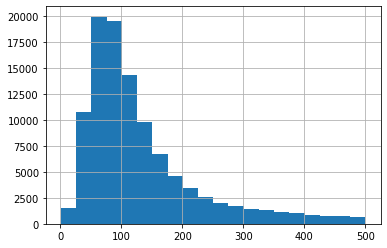

In [19]:
df['text'].str.len().hist(bins=20)

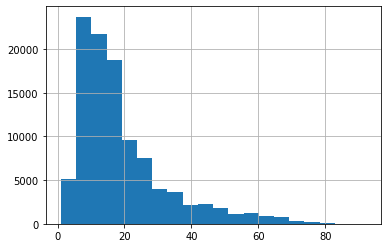

In [20]:
df['words_count'].hist(bins=20)

In [21]:
df['text'].str.len().describe()

count    104966.000000
mean        130.811701
std          93.721861
min           1.000000
25%          68.000000
50%         101.000000
75%         159.000000
max         500.000000
Name: text, dtype: float64

In [22]:
df[df['accident'] == 1]['text'].str.len().describe()

count    45132.000000
mean       143.142028
std         99.155931
min          3.000000
25%         75.000000
50%        112.000000
75%        177.000000
max        500.000000
Name: text, dtype: float64

In [23]:
sample_text(
    df[
        (df['accident'] == 0) &
        (df['text'].str.len() >= 78) &
        (df['text'].str.len() <= 226)
    ]
)

(31402, 12)
____________________________________________________________________________________________________
1174625 (accident: 0 len: 114)
Карусель на Колонтай 3. Торговый центр ЛондонМолл.

Пост с новостью о пожаре: https://vk.com/wall-68471405_1173082
____________________________________________________________________________________________________
5630723 (accident: 0 len: 78)
Пьяный собрал 4 машины на Московской трассе в сторону СПб, прямо перед Любанью
____________________________________________________________________________________________________
8348123 (accident: 0 len: 89)
В новом Петергофе оцепили вокзал.. Всё перекрыто, полиция, реанимации, что то случилось 😐
____________________________________________________________________________________________________
4361476 (accident: 0 len: 133)
Неплохо бы за такое вождение наказать! Пересечение двойной сплошной с обгоном и проезд на красный свет по встречке на Шоссе Революции
____________________________________________

In [24]:
sample_text(
    df[
        (df['accident'] == 1) &
        (df['text'].str.len() > 200)
    ]
)

(9194, 12)
____________________________________________________________________________________________________
861128 (accident: 1 len: 364)
Утеряны документы. А именно водительское удостоверение на имя Рязанцев Денис Владимирович, свидетельство о регистрации Форд Мондео, свидетельство о регистрации мотоцикла Хонда, и страховки к ним. нашедшим просьба позвонить по телефону 8-911-999-87-70 Денис, или пишите в ВК [id472059|Денис Рязанцев]. 
Вознаграждение гарантировано. 
Максимальный репост пожалуйста.
____________________________________________________________________________________________________
1510513 (accident: 1 len: 231)
На 16:25 КАД, внутреннее кольцо не доезжая Вантового: в левом ряду кашкайка занырнул под газель.. 
А на мосту еще: в правом ряду Опель на аварийке с открытым капотом 😏

+Фото: [id58704273|Юлия Карина], [id104213372|Владимир Фролов]
____________________________________________________________________________________________________
3942996 (accident: 1 len: 29

In [25]:
sample_text(
    df[
        (df['accident'] == 1) &
        (df['words_count'] > 60)
    ]
)

(1237, 12)
____________________________________________________________________________________________________
94722 (accident: 1 len: 462)
КАД. Внешнее кольцо, возле съезда в Низино авария: левый и средний ряд. 4 или 5 авто. ДПС на месте. Еще одно масштабное: внутреннее кольцо, на дамбе (между Кронштадтом и Приморкой. С жертвами. [id118915|Леночка По]

22:10. Проезжали КАД, внутренняя сторона, после Кронштадта авария на 3 и 2 полосе. Боковое столкновение Санйонг и Внедорожника, сильно вмялись, рядом Газель развернутая и перед ДТП еще пару машин. Лежит укрытый труп... [id12740851|Julia Smirnova]
____________________________________________________________________________________________________
4013307 (accident: 1 len: 419)
Серьёзное ДТП произошло на КАД на развязке с Красносельским шоссе.

Как сообщает отдел пропаганды УГИБДД по Петербургу и области, около 18:50 на внешнем кольце в районе съезда на проспект Маршала Жукова 47-летняя женщина на «Лексусе» врезалась в стоящий в левом ря

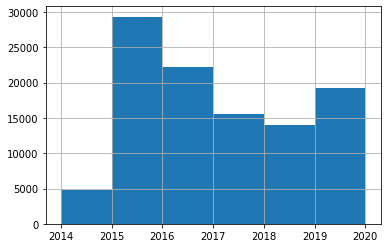

In [26]:
df['date'].dt.year.hist(bins=6)

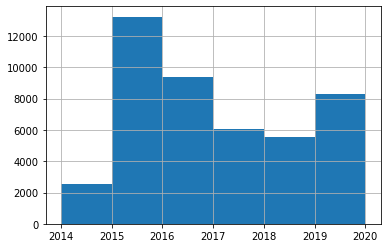

In [27]:
df[df['accident'] == 1]['date'].dt.year.hist(bins=6)

In [28]:
sample_text(
    df[df['text'].str.contains('утопленник', case=False)]
)

(19, 12)
____________________________________________________________________________________________________
4184476 (accident: 0 len: 379)
Утопленник в Неве 
у Набережной Обуховской обороны.
Объявление о поиске Свидетелей : https://vk.com/wall-37497136_163465
 
"Ищем человека! Ищем очевидцев! 
В пятницу 24.06. примерно в пол девятого вечера с Володарского моста прыгнул молодой человек. Был в синей футболке, джинсах. На вид 30-35 лет. Если кто-нибудь что-то видел, пожалуйста, дайте знать"
[id98943|Регина Морякова]
____________________________________________________________________________________________________
9273396 (accident: 0 len: 157)
В парке на Ивана Фомина кто-то решил искупаться. Достали. Вроде живой. Приехала реанимация.

Там не утопленник, там драка... Скорая на месте оказывает помощь
____________________________________________________________________________________________________
1525668 (accident: 0 len: 336)
В парке 300летия что-то непонятное. 
Спасатели и скорая н

In [29]:
sample_text(
    df[df['text'].str.contains('собака', case=False)]
)

(203, 12)
____________________________________________________________________________________________________
9810963 (accident: 0 len: 271)
Пассажиров прибывших в Санкт-Петербург на пароме "Принцесса Анастасия" с 9 часов не пускают в морской вокзал. По имеющейся информации в здании что-то ищут с собаками. 
 Нашли чемодан с проводами. Всех эвакуировали и попросили отойти от здания.
Люди 2 часа стоят на улице.
____________________________________________________________________________________________________
9296955 (accident: 0 len: 368)
Дальневосточный 15, 23.07.2018 5.45 утра , неравнодушные сотрудники ближайшей бензоколонки услышали скуление собаки, как выяснилось бездомный пёс увяз всеми лапами в песке, торчала только голова. По телефону 01 были вызваны пожарные. Успешно извлекли пса, правда, всеж немного покусал своих спасителей. Оказавшись на свободе собака отправилась восвояси. Все добра ! 😉🚒
_____________________________________________________________________________________

In [30]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('служб нет', case=False)
    ]
)

(1560, 12)
____________________________________________________________________________________________________
7512860 (accident: 0 len: 178)
На 1-ой Красноармейской, напротив БГТУ военмех, трамваи встанут, пострадавших нет
VW выезжал со второстепенной, форд ехал от Измайловского проспекта по Красноармейской, служб нет
____________________________________________________________________________________________________
5202929 (accident: 0 len: 116)
Комбо! 4 красавы,похожу на летней
Служб нет
Движение 30км/ч
Октябрьская набережная,82 в сторону када
Актуально 19:55
____________________________________________________________________________________________________
1484196 (accident: 0 len: 76)
На углу краснопутиловской и кубинской. Маленькая пробка, служб нет. Все живы
____________________________________________________________________________________________________
2597449 (accident: 0 len: 64)
Литейный мост,на рельсах в обе стороны!служб нет,движению мешают
_________________________

In [31]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('жертв нет', case=False)
    ]
)

(285, 12)
____________________________________________________________________________________________________
1759030 (accident: 0 len: 75)
Парашютная -долгоозерная Дпс нет, жертв нет , пробки быть ) актуально 16:15
____________________________________________________________________________________________________
2267289 (accident: 0 len: 70)
Московский проспект в сторону центра. Жертв нет, служб нет, пробки нет
____________________________________________________________________________________________________
1603406 (accident: 0 len: 249)
Только что.Угол Ланского шоссе и Новосибирской улицы.Ваз 2110 и Красный хёндай.Жертв нет,дпс нет.Водитель ваза очень сильно расстроен и бьёт свою машину,видимо виноват красный,сори за фото уже темно.Ах да,проезду мешают слегка,пробки не предвидится.
____________________________________________________________________________________________________
4746372 (accident: 0 len: 66)
Съезд на рыбацкое жертв нет возможно будет пробка актуально в 8:53
_

In [32]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('не мешают', case=False)
    ]
)

(701, 12)
____________________________________________________________________________________________________
77914 (accident: 0 len: 114)
Только что! Пересечение придорожной аллеи и проспекта Художников. Хендэ и бэха единичка. Движению особо не мешают.
____________________________________________________________________________________________________
3872533 (accident: 0 len: 160)
На Литовской у дома  10, Водитель шкоды открывал дверь и не заметил велосипедиста. Все живы, велосипедисту оказан мед помощь. Службы на месте, проезду не мешают
____________________________________________________________________________________________________
3841142 (accident: 0 len: 133)
Сложный поворот с Комсомола-на Арсенальную и на Кондратьевский проспект не очень получился 
стоят по середине ,пока никому не мешают.
____________________________________________________________________________________________________
7601316 (accident: 0 len: 82)
Ранили 99-ую на перекрестке Дальневосточного и Новосело

In [33]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('дпс', case=False)
    ]
)

(4141, 12)
____________________________________________________________________________________________________
898051 (accident: 0 len: 181)
На волхонском шоссе огромная пробка из-за сворачивающих на кладбище по состоянию на 14.00, два наряда ДПС регулируют движение. Умников на обочине стопорил мужик на крузаке, молодец!
____________________________________________________________________________________________________
10383093 (accident: 0 len: 88)
На  Тихорецком, перед Светлановским в сторону Северного, Киа чмокнула Хаммер  а ДПС нет.
____________________________________________________________________________________________________
948971 (accident: 0 len: 191)
На Советском проспекте в сторону пос. Металлострой Кроссовер ударил прямо в бак выезжающему Камазу, перекрыли все направление, Объезд по обочине ДПС нет . Вовремя домой будет весело стоять(((
____________________________________________________________________________________________________
1127933 (accident: 0 len: 81)
1

In [34]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('притерлась', case=False)
    ]
)

(32, 12)
____________________________________________________________________________________________________
6719795 (accident: 0 len: 132)
Во дворе домов   31 кор.5 и 31 кор.4  по Витебскому просректу девушка притерлась к припаркованному автомобилю .
Проехать невозможно.
____________________________________________________________________________________________________
1097990 (accident: 0 len: 74)
Напротив метро Большевиков хендай притерлась с автобусом, 2 ряд,  гаи нет.
____________________________________________________________________________________________________
4622409 (accident: 0 len: 96)
Легковушка притерлась к автобусу на Ириновском пр. у д.33/49. ГАИ уже на месте. Объезд в карман.
____________________________________________________________________________________________________
4114046 (accident: 0 len: 82)
Янинская классика! Ауди притерлась в грузовичку в Среднем ряду из города в область
______________________________________________________________________________

In [35]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('перестроилась', case=False)
    ]
)

(0, 12)


In [36]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('яндекс', case=False)
    ]
)

(198, 12)
____________________________________________________________________________________________________
7520173 (accident: 0 len: 176)
На Старо-Петергофском у дома 30 корп 1 открытый люк. Если ехать от Нарвской к Обводному. Вчера позвонили в 112 и они поставили знак. Метки с Яндекс карт убирают. [id13704328|.]
____________________________________________________________________________________________________
13739126 (accident: 0 len: 123)
На проспекте Науки у  дома 30к1 на полосе  в сторону Карпинского Яндекс Драйв догнал Жигу. 
Трамваи в сторону ручьев стали.
____________________________________________________________________________________________________
12099278 (accident: 0 len: 115)
В конце Комендантского проспекта Яндекс-драйв собрал несколько припаркованных машин. Виновник оставил машину и ушел
____________________________________________________________________________________________________
10745950 (accident: 0 len: 98)
Яндекс.Драйв потерпел крушение у дома 101 к

In [37]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('стоят', case=False)
    ]
)

(2662, 12)
____________________________________________________________________________________________________
12616826 (accident: 0 len: 96)
В Лавриках сломался переезд. Стоят уже минут 30 и перспектив впереди никаких. 
Мужайтесь, хлопцы
____________________________________________________________________________________________________
2572987 (accident: 0 len: 92)
Маршала Говорова 15, гаи нет пострадавших тоже, боковой удар. Трамваи стоят. Актуально 16.15
____________________________________________________________________________________________________
6212624 (accident: 0 len: 55)
Стоят в правом ряду возле главного входа в ТРЦ Галерею.
____________________________________________________________________________________________________
6242129 (accident: 0 len: 185)
Лансер догнал Шкоду на пешеходнике Карповки и Медиков под стрелкой на Медиков в сторону Кантемировского моста. Стоят мешают ВСЕМ, кроме самих себя! Пешеходам, автомобилистам... ДПС нет.
_______________________________

In [38]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('сильный удар', case=False)
    ]
)

(10, 12)
____________________________________________________________________________________________________
6008343 (accident: 0 len: 397)
На Октябрьской набережной по направлению из центра перед Володарским мостом образовалась дыра в асфальте. 
Будьте аккуратны! Заявку в 004 оставила, её приняли и сказали, что звонят многие. Странно, что никто еще не приехал и не оградил.

"Было ограждение,но его неоднократно сносили...Каждая 3 машина получает сильный удар в подвеску...оттормаживайтесь заранее! " Предупреждает [id68675090|Максим]
____________________________________________________________________________________________________
9957666 (accident: 0 len: 182)
ДАЧНЫЙ пр./НОВАТОРОВ, разворот в сторону КАД.
Очень сильный удар, люди сразу кинулись помогать, отключать аккумулятор. Вторая машина далеко уехала, за остановку, стоит во втором ряду
____________________________________________________________________________________________________
3521801 (accident: 0 len: 154)
В час ночи   н

In [39]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('снёс', case=False)
    ]
)

(108, 12)
____________________________________________________________________________________________________
11531461 (accident: 0 len: 40)
На площади Ленина трамвай снёс зад мерсу
____________________________________________________________________________________________________
13487015 (accident: 0 len: 70)
Рено снёс отбойник на развязке Кировск и Шлиссельбург перед постом ДПС
____________________________________________________________________________________________________
4036634 (accident: 0 len: 113)
Олеко дундича д.36к1.  Снёс бампер об припаркованную машину.У водителя припаркованной машины утром будет сюрприз.
____________________________________________________________________________________________________
4320773 (accident: 0 len: 84)
Уральская и пер.Декабристов, напротив Ленты. Грузовик Renault(что???!!:) ) снёс Juke
____________________________________________________________________________________________________
2648488 (accident: 0 len: 141)
Ваз 2111 снёс огражд

In [40]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('пешеход', case=False)
    ]
)

(880, 12)
____________________________________________________________________________________________________
9704315 (accident: 0 len: 109)
На Двинской улице автобус не успел остановиться перед пешеходным переходом и наехал 69 летней женщине на ногу
____________________________________________________________________________________________________
1583144 (accident: 0 len: 142)
Приозерское ш. в город напротив 10-го дома на пешеходнике. УАЗ патриот догнал какую то китайскую хрень. Все живы служб нет. Актуально на 10:50
____________________________________________________________________________________________________
4705467 (accident: 0 len: 87)
На пересечении  Рузовской ул. и Клинского проспекта ,микрик вынесло на пешеходную зону!
____________________________________________________________________________________________________
11889643 (accident: 0 len: 82)
Пешеходный переход с препятствиями в Пушкине на Саперной улице напротив дома 40к4.
_______________________________________

In [41]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('сао', case=False)
    ]
)

(47, 12)
____________________________________________________________________________________________________
13774739 (accident: 0 len: 147)
В кармане на проспекте Славы у дома 8  Мерседес влетел в припаркованные автомобили. 
Водитель с признаками САО ( со слов 5 разбитых машин) скрылся.
____________________________________________________________________________________________________
12215795 (accident: 0 len: 160)
Водитель с признаками САО влетел в столб на перекрёстке Шлиссельбургского и  Дмитрия Устинова. В машине был ещё пассажир, тоже в сао. Все живы. Службы на месте.
____________________________________________________________________________________________________
12832351 (accident: 0 len: 151)
В 2:40 произошла погоня на среднеохтинском проспекте.
Обстоятельства не сообщаются, водитель был с признаками сао и гнал по городу с высокой скоростью.
____________________________________________________________________________________________________
11515041 (accident: 0 len: 211

In [42]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('столб', case=False)
    ]
)

(645, 12)
____________________________________________________________________________________________________
13017147 (accident: 0 len: 87)
Ауди поймала столб на пересечении набережной Обводного канала и Митрофаньевского шоссе.
____________________________________________________________________________________________________
4078835 (accident: 0 len: 62)
На Площади Мужества горит электрическая проводка внутри столба
____________________________________________________________________________________________________
9825489 (accident: 0 len: 180)
Возле перекрестка с Лужской улицей у дома 93 автобус выполнял разворот на пр Луначарского. Водитель не заметил столб и снёс его кабиной. Никто не пострадал, провода были в обмотке.
____________________________________________________________________________________________________
6725118 (accident: 0 len: 116)
В Павлово, за остановкой на Кировск, Ваз 2114 снес столб и дерево и повис в кустах,
непонятно, когда и как случилось
______________

In [43]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('приуныл', case=False)
    ]
)

(70, 12)
____________________________________________________________________________________________________
1239091 (accident: 0 len: 108)
Угол Типанова и Гагарина.Газелька присела,владельцы приуныли.Пробка вроде не предвидится.Актуально на 12:00.
____________________________________________________________________________________________________
928602 (accident: 0 len: 40)
В Старой Деревне чет светофор приуныл:))
____________________________________________________________________________________________________
5204516 (accident: 0 len: 55)
икстрейл приуныл на газоне набережной реки Карповки 13,
____________________________________________________________________________________________________
8623642 (accident: 0 len: 90)
На Лапинском проспекте около молокозавода, грузовик  не вошёл в поворот и приуныл в кювете
____________________________________________________________________________________________________
8748683 (accident: 0 len: 108)
У съезда с путепровода на Малое Карлин

In [44]:
sample_text(
    df[
        (df['accident'] == 0) &
        df['text'].str.contains('прилег отдохнуть', case=False)
    ]
)

(25, 12)
____________________________________________________________________________________________________
12270984 (accident: 0 len: 186)
Сюрприз на новой велопешеходной дорожке вдоль проспекта Непокоренных около Пискаревского парка, 
 Хендайчик перемахнул через кусты и прилег отдохнуть.

Водитель цел и осматривает машину.
____________________________________________________________________________________________________
11547360 (accident: 0 len: 96)
Прилег отдохнуть на развороте в Славянку, таджики дружно таскают остатки бананов, пробке быть!!!
____________________________________________________________________________________________________
7528116 (accident: 0 len: 29)
Прилег отдохнуть на Динамо 3.
____________________________________________________________________________________________________
8099650 (accident: 0 len: 65)
Фургон прилег отдохнуть напротив дома 76 по проспекту Металлистов
____________________________________________________________________________________